In [ ]:
%pip install llama-index

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install llama-index-embeddings-huggingface

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install replicate


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install llama-index-llms-replicate

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install gdsfactory

In [ ]:
import os
from llama_index.core import (
    SimpleDirectoryReader,
    ServiceContext,
)
from llama_index.llms.replicate import Replicate
from llama_index.core.graph_stores import SimpleGraphStore
from llama_index.core import StorageContext


"""
Other language models supported by replicate:

google gemma: google-deepmind/gemma-7b-it:2790a695e5dcae15506138cc4718d1106d0d475e6dca4b1d43f42414647993d5
llama2-70B: andreasjansson/sheep-duck-llama-2-70b-v1-1-gguf:a8d46304cdc3e0b4f18773b2863a0bf24a1daa7fd43e9e94f6d7f197a759152b
llama2-70B: meta/llama-2-70b-chat
codellama-70B: meta/codellama-70b-python:338f2fc1036f847626d0905c1f4fbe6d6d287a476c655788b3f1f27b1a78dab2
codellama-34B: meta/codellama-34b-instruct:eeb928567781f4e90d2aba57a51baef235de53f907c214a4ab42adabf5bb9736
mistral: mistralai/mixtral-8x7b-instruct-v0.1
llama3-70B: meta/meta-llama-3-70b-instruct
"""


os.environ["REPLICATE_API_TOKEN"] = "ENTER YOUR REPLICATE API KEY HERE"


llm = Replicate(
    model="mistralai/mixtral-8x7b-instruct-v0.1",
    is_chat_model=True,
    additional_kwargs={"max_new_tokens": 512}
)


service_context = ServiceContext.from_defaults(llm=llm, embed_model="local:BAAI/bge-small-en-v1.5")


graph_store = SimpleGraphStore()
storage_context = StorageContext.from_defaults(graph_store=graph_store)

/var/folders/0t/85tdrsb92jd7c29p9mjcj1lw0000gn/T/ipykernel_1306/3165786720.py:28: DeprecationWarning: Call to deprecated class method from_defaults. (ServiceContext is deprecated, please use `llama_index.settings.Settings` instead.) -- Deprecated since version 0.10.0.
  service_context = ServiceContext.from_defaults(llm=llm, embed_model="local:BAAI/bge-small-en-v1.5")


In [ ]:
from llama_index.core import SQLDatabase
from sqlalchemy import create_engine
from llama_index.core.query_engine import NLSQLTableQueryEngine

engine = create_engine("sqlite:///final_test.db", future=True)
with engine.connect() as connection:
    cursor = connection.exec_driver_sql('''SELECT * FROM DevicesTable ''')
    print(cursor.fetchall())

sql_database = SQLDatabase(engine, include_tables=["DevicesTable"])

sql_query_engine = NLSQLTableQueryEngine(
    sql_database=sql_database,
    tables=["DevicesTable"],
)

[(2, '1x2 MMI', 1530, 1565, 'width_mmi = 3.8', 'length_mmi = 12.8', 'gap_mmi = 0.25', 'length_taper = 10.0', 'width_taper = 1.4', 'width=0.0', "c = gf.components.mmi1x2(width_taper=1.0, length_taper=10.0, length_mmi=5.5, width_mmi=2.5, gap_mmi=0.25, width=0.0, cross_section='xs_sc')"), (8, '1x2 MMI', 1260, 1360, 'width_mmi = 1.5', 'length_mmi = 1.8', 'gap_mmi = 0.3', 'length_taper = 10.0', 'width_taper = 0.5', 'width = 0.41', "c = gf.components.mmi1x2(width_taper=1.0, length_taper=10.0, length_mmi=5.5, width_mmi=2.5, gap_mmi=0.25, width=0.0, cross_section='xs_sc')")]


In [ ]:
# create query engine for SQL Database
sql_query_engine = NLSQLTableQueryEngine(
    sql_database=sql_database,tables=["DevicesTable"], llm=llm
)

In [ ]:
sql_query_engine = NLSQLTableQueryEngine(
    sql_database=sql_database,tables=["DevicesTable"], llm=llm
)

In [ ]:
from llama_index.core import VectorStoreIndex

# import documentation
documents = SimpleDirectoryReader("gdsfactory").load_data()

vector_index_inst = VectorStoreIndex.from_documents(
    documents = documents, service_context=service_context,
)

query_engine_vector_inst = vector_index_inst.as_query_engine()

2024-04-09 13:50:37.124 | INFO     | gdsfactory.technology.layer_views:to_lyp:1018 - LayerViews written to '/var/folders/0t/85tdrsb92jd7c29p9mjcj1lw0000gn/T/gdsfactory/mzi_splittermmi1x2_d9238bd0.lyp'.


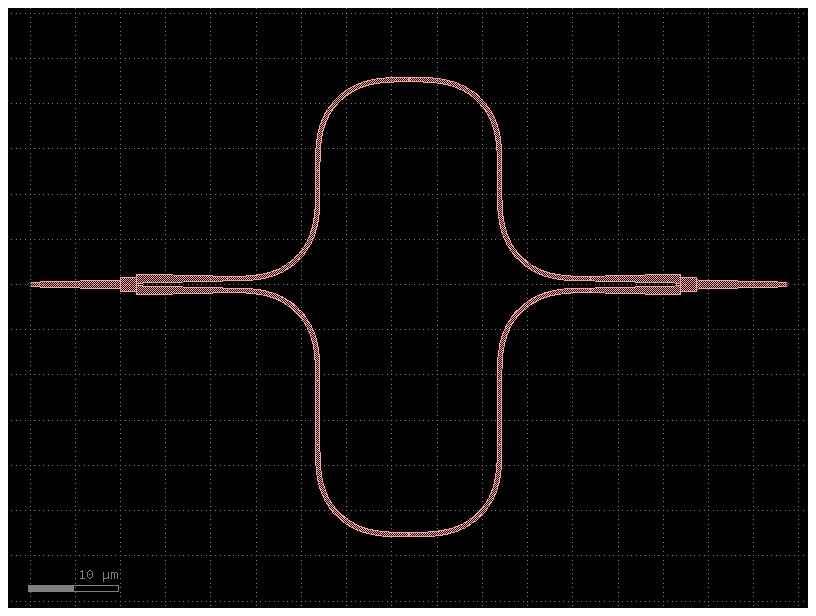

In [ ]:
import gdsfactory as gf
c = gf.components.mzi(delta_length=10.0, length_y=2.0, length_x=0.1, splitter = gf.components.mmi1x2(width_mmi = 1.5 , length_mmi = 1.8 , gap_mmi = 0.3 ), with_splitter=True, port_e1_splitter='o2', port_e0_splitter='o3', port_e1_combiner='o2', port_e0_combiner='o3', nbends=2, cross_section='xs_sc', mirror_bot=False, add_optical_ports_arms=False, add_electrical_ports_bot=True, min_length=0.01)
c.plot()

0
The response from the query results for a 1x2 MMI operating at a wavelength of 1550 nm is:

parameter1 = width_mmi = 3.8 um
parameter2 = length_mmi = 12.8 um
parameter3 = gap_mmi = 0.25 um
parameter4 = length_taper = 10.0 um
parameter5 = width_taper = 1.4 um
parameter6 = width = 0.0 um
function_call = gf.components.mmi1x2(width_taper=1.0, length_taper=10.0, length_mmi=5.5, width_mmi=2.5, gap_mmi=0.25, width=0.0, cross_section='xs_sc')
sql parameters:
{'width_mmi': 3.8, 'length_mmi': 12.8, 'gap_mmi': 0.25, 'length_taper': 10.0, 'width_taper': 1.4, 'width': 0.0}
default parameters:
{'width_taper': 1.0, 'length_taper': 10.0, 'length_mmi': 5.5, 'width_mmi': 2.5, 'gap_mmi': 0.25, 'width': 0.0}
import gdsfactory as gf
c = gf.components.mmi1x2(width_taper=1.0, length_taper=10.0, length_mmi=5.5, width_mmi=3.8, gap_mmi=0.25, width=0.0, cross_section='xs_sc')
c.plot()
{'width_taper': 1.0, 'length_taper': 10.0, 'length_mmi': 5.5, 'width_mmi': 3.8, 'gap_mmi': 0.25, 'width': 0.0}
wrong parameters

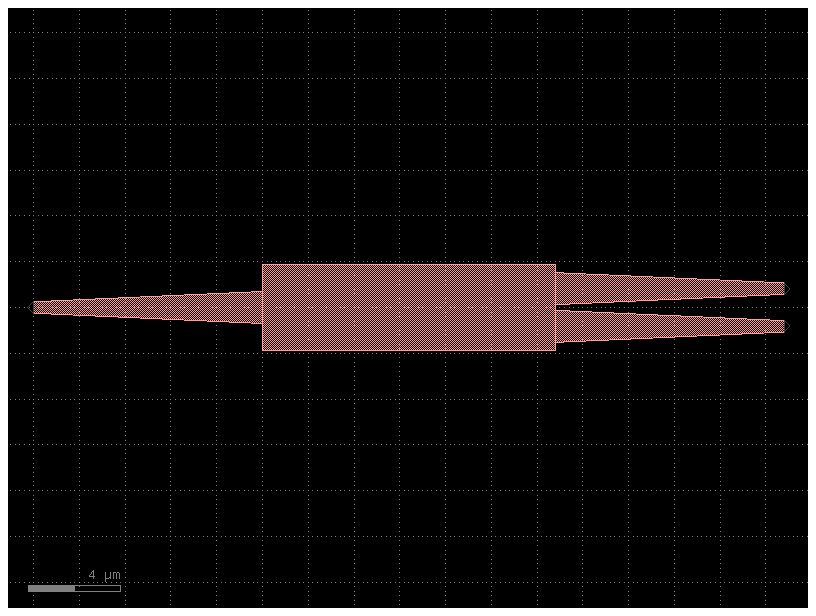

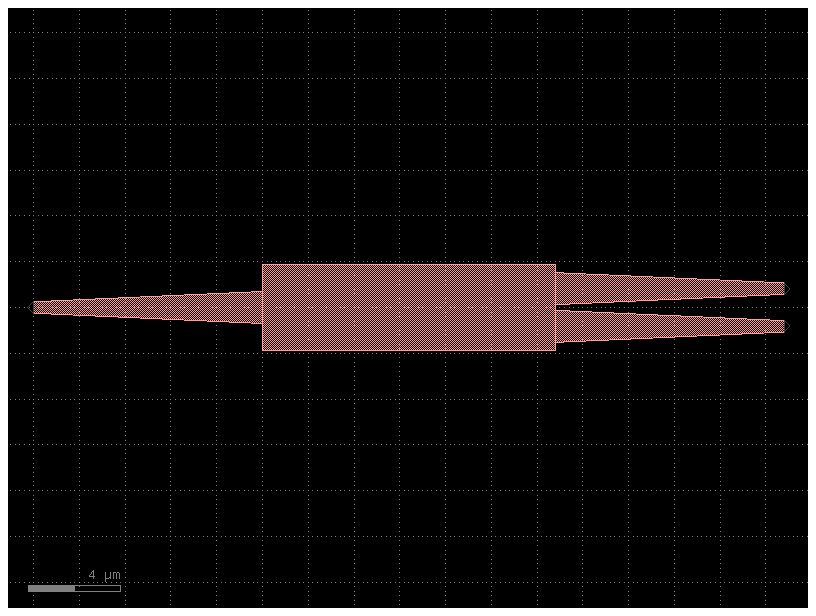

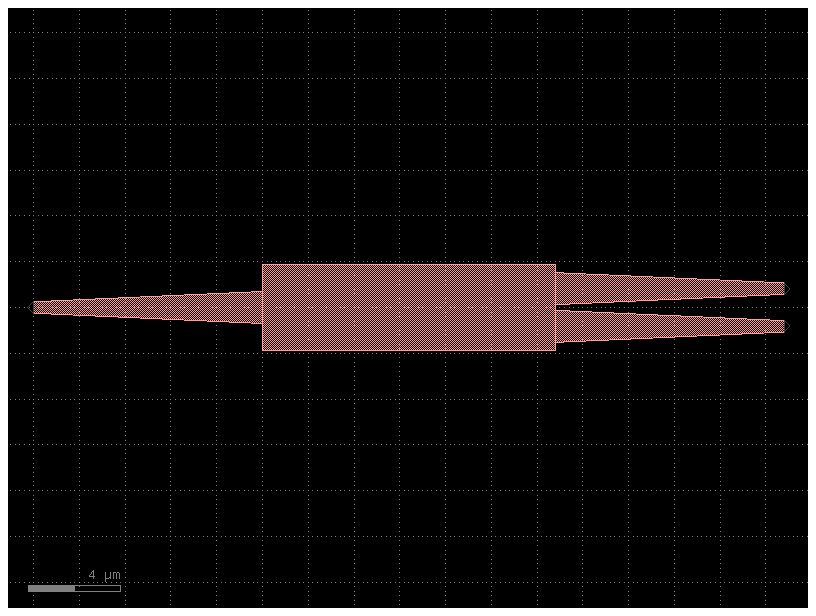

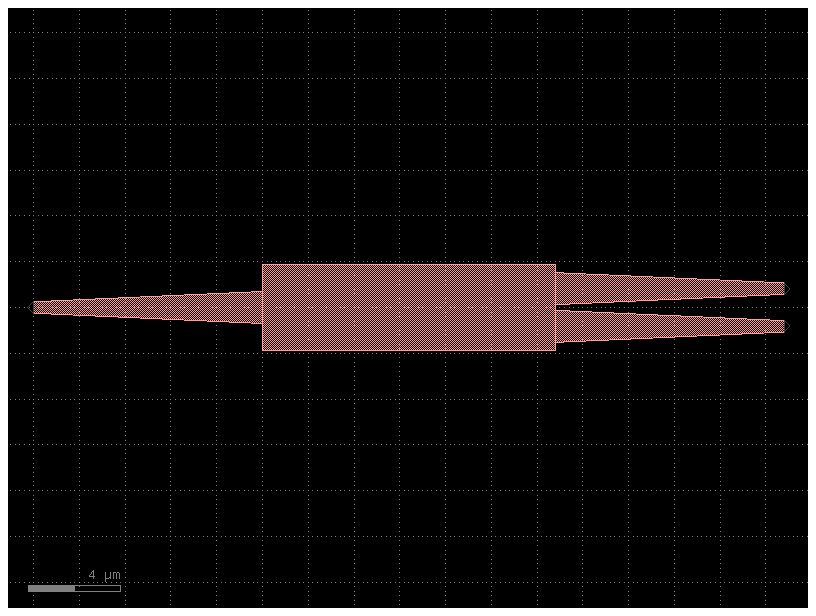

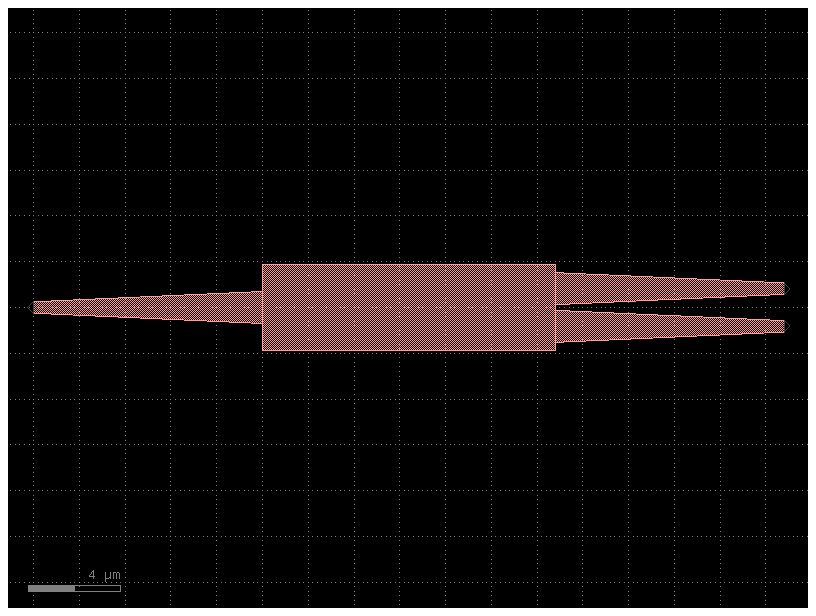

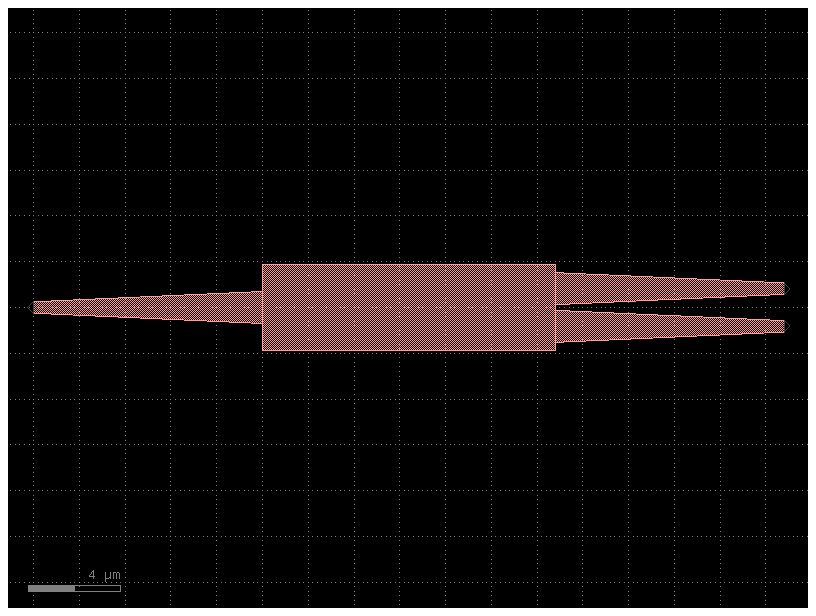

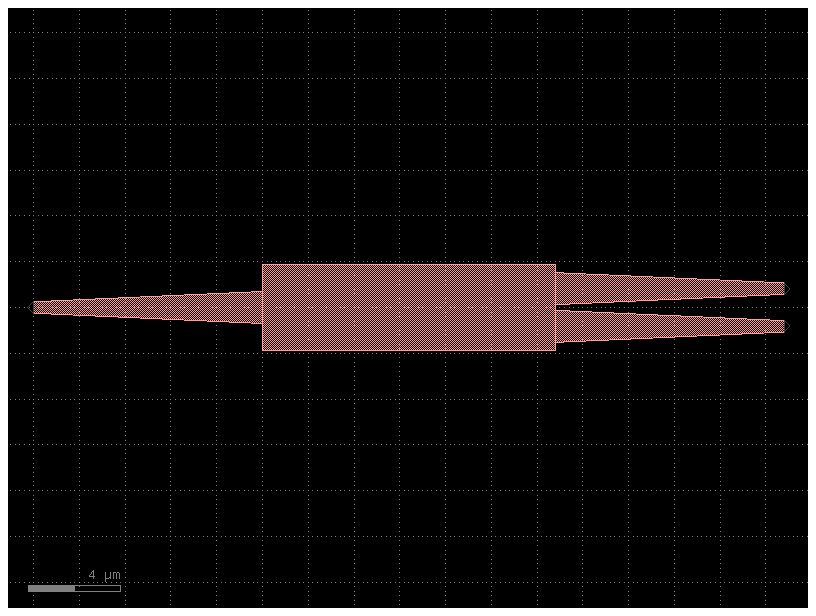

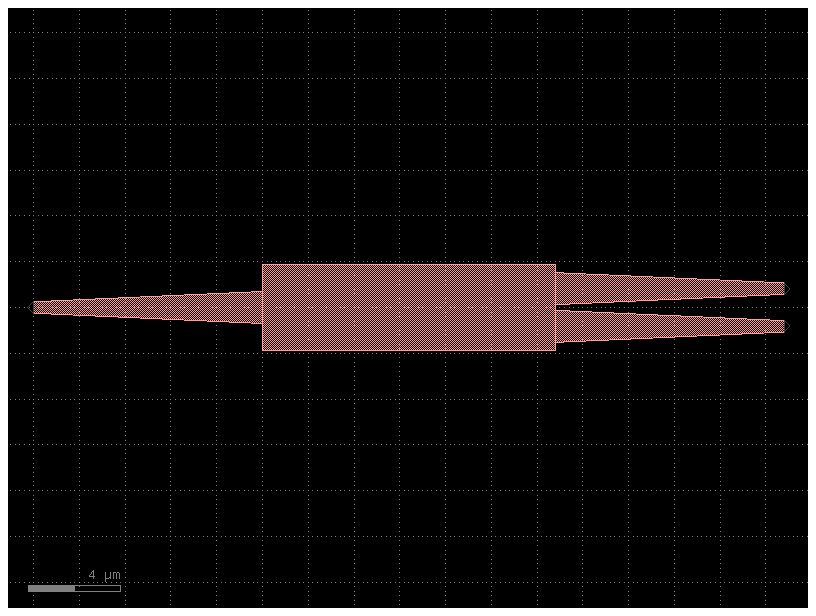

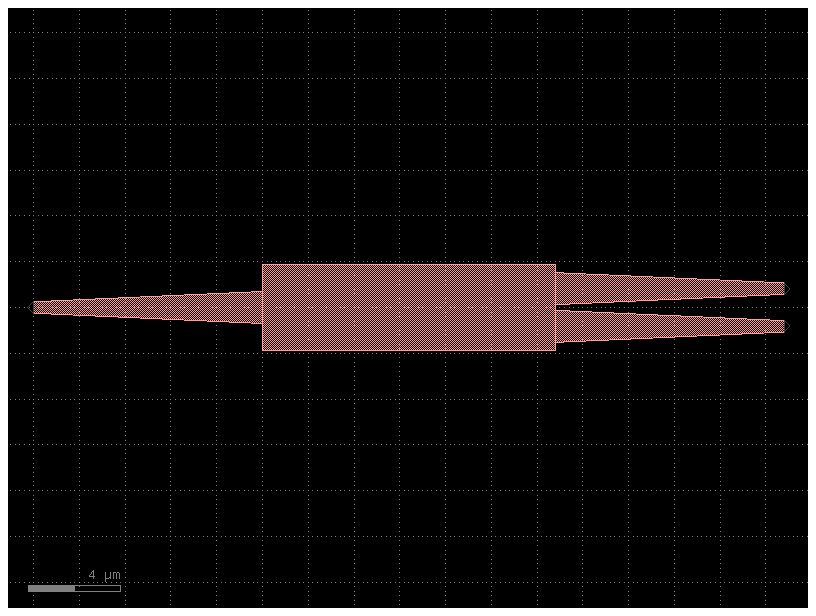

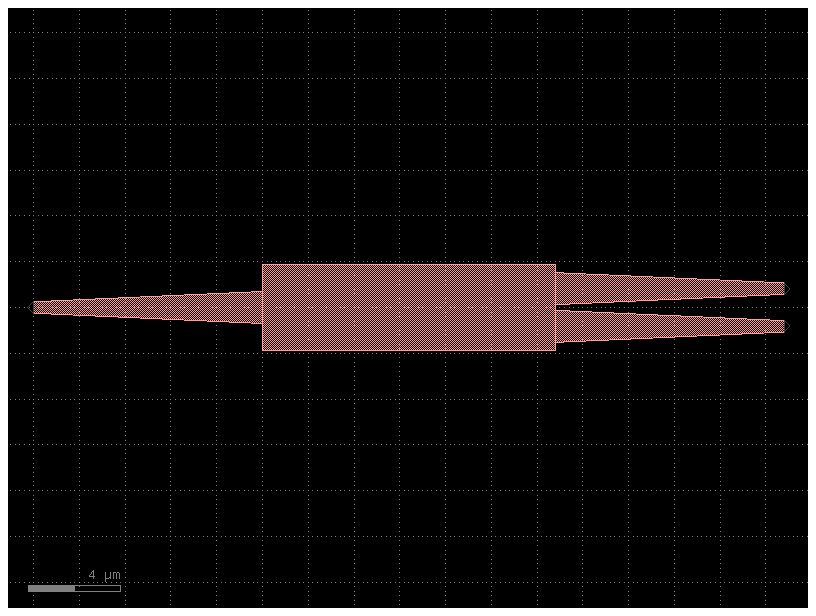

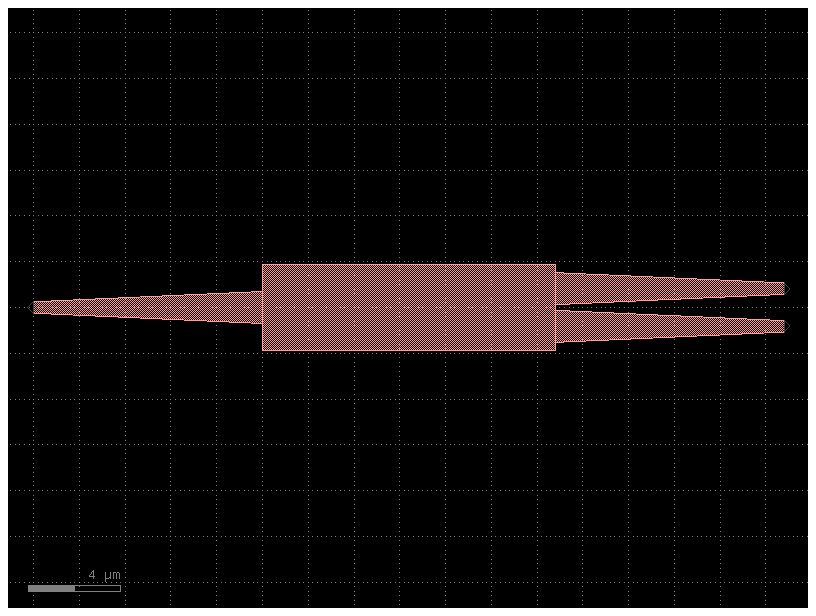

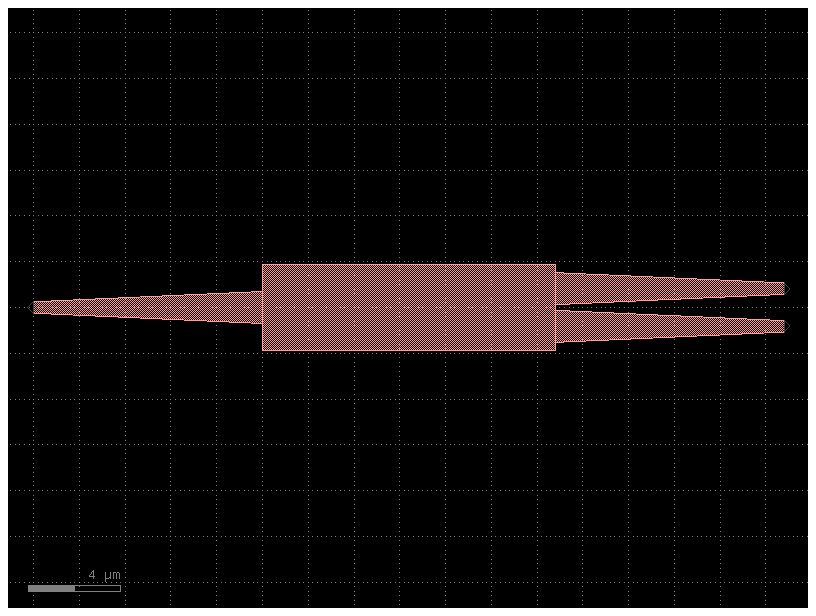

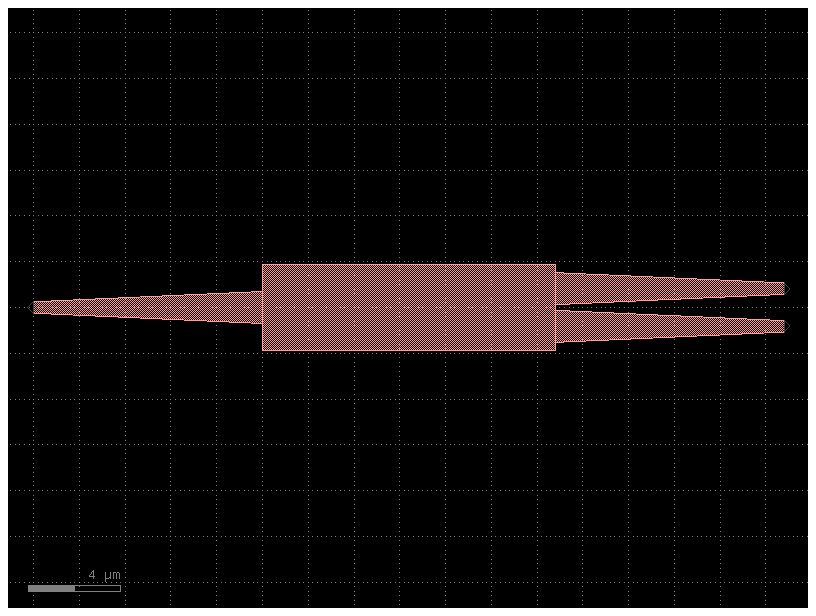

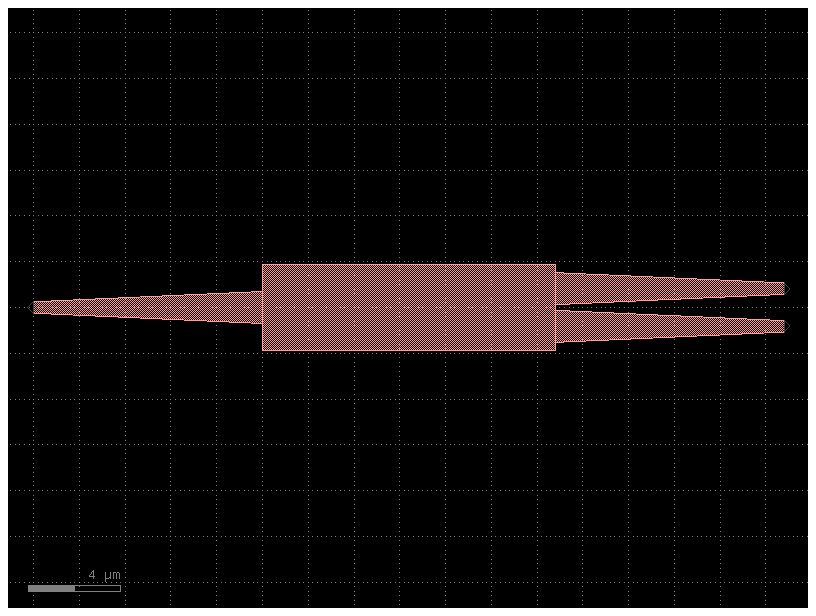

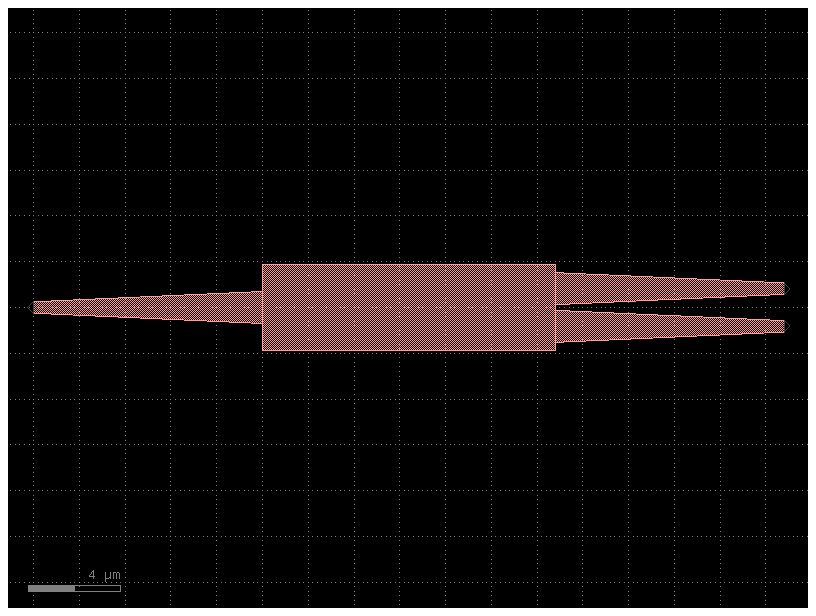

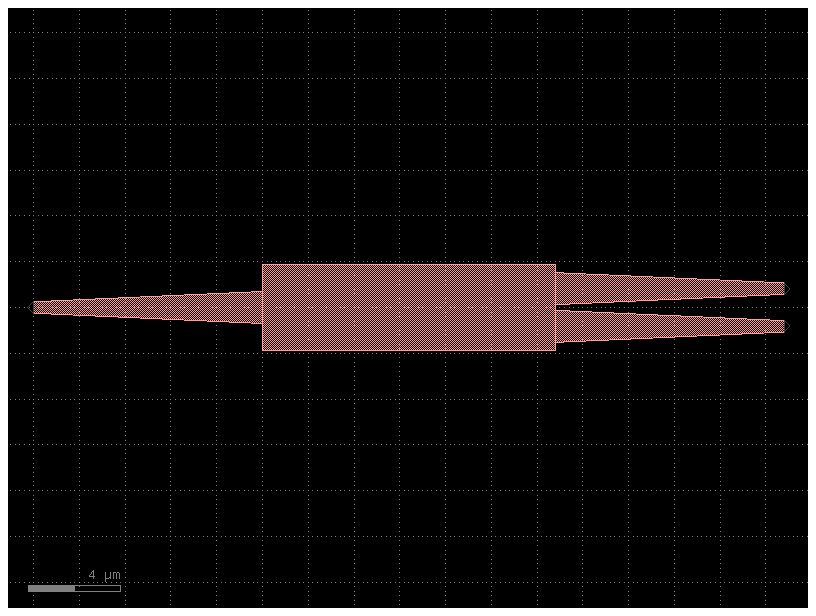

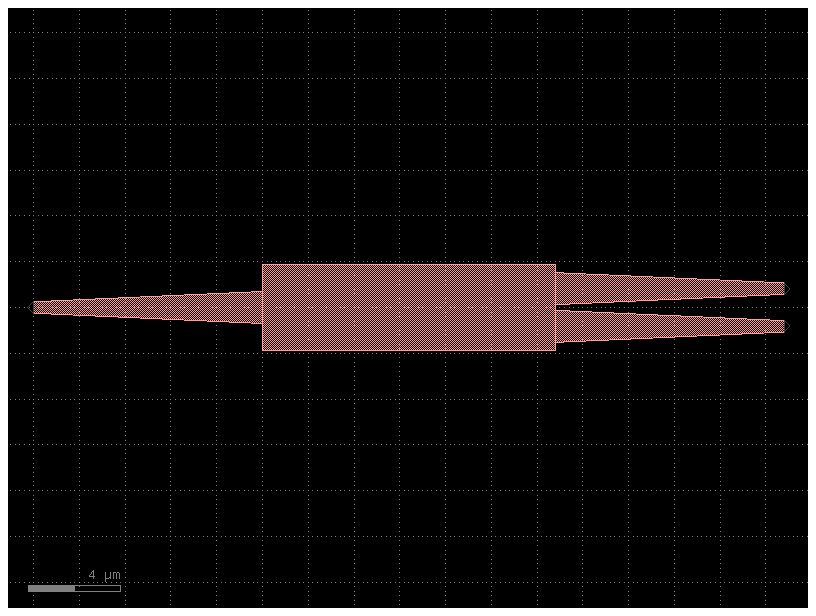

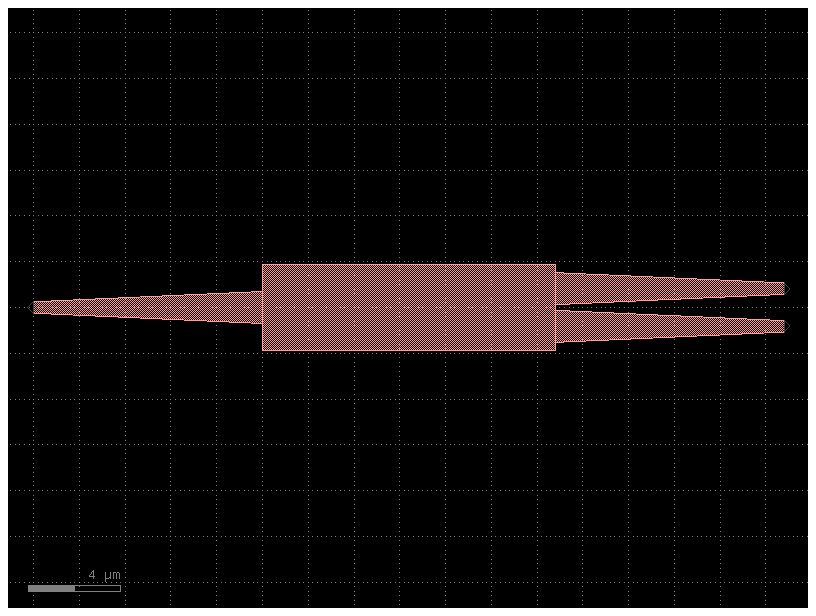

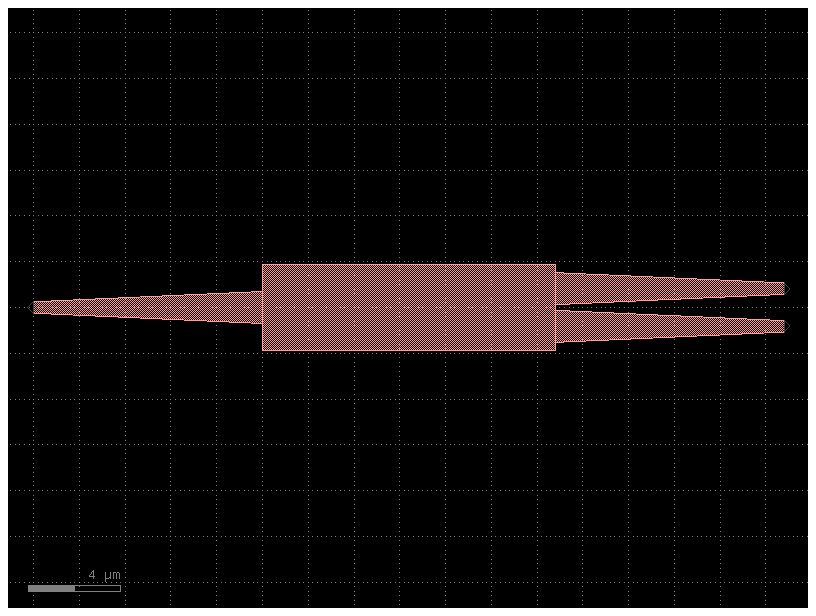

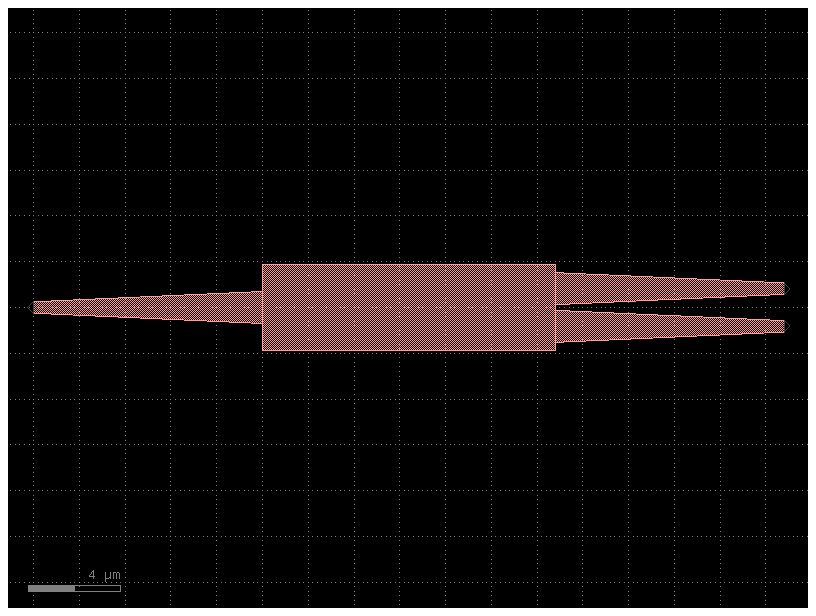

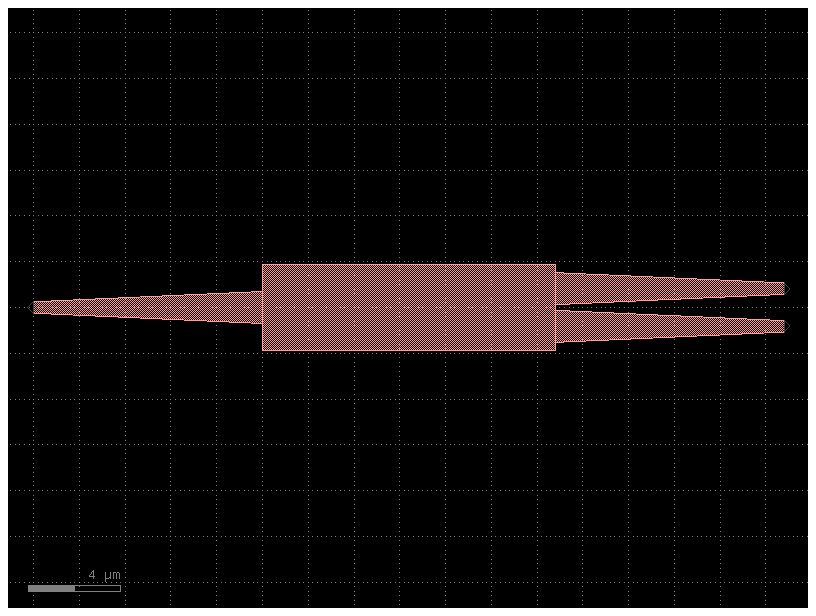

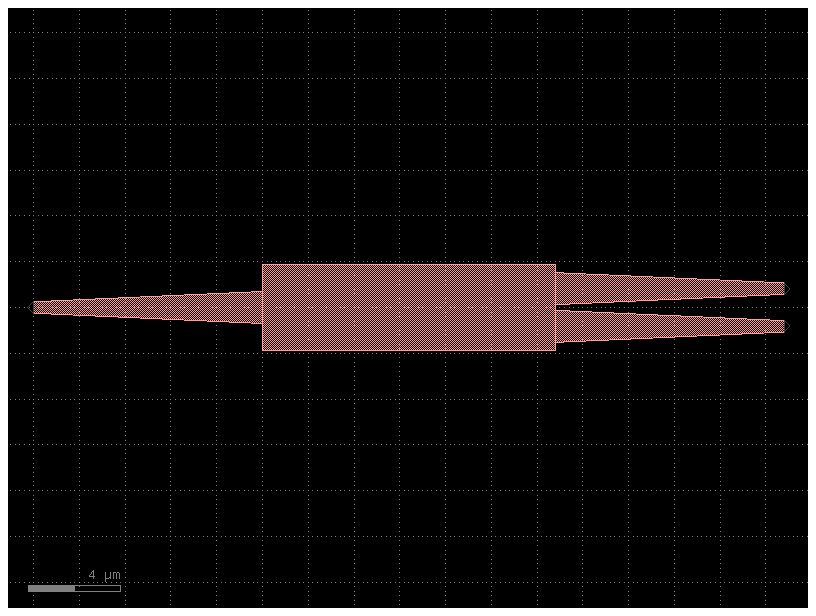

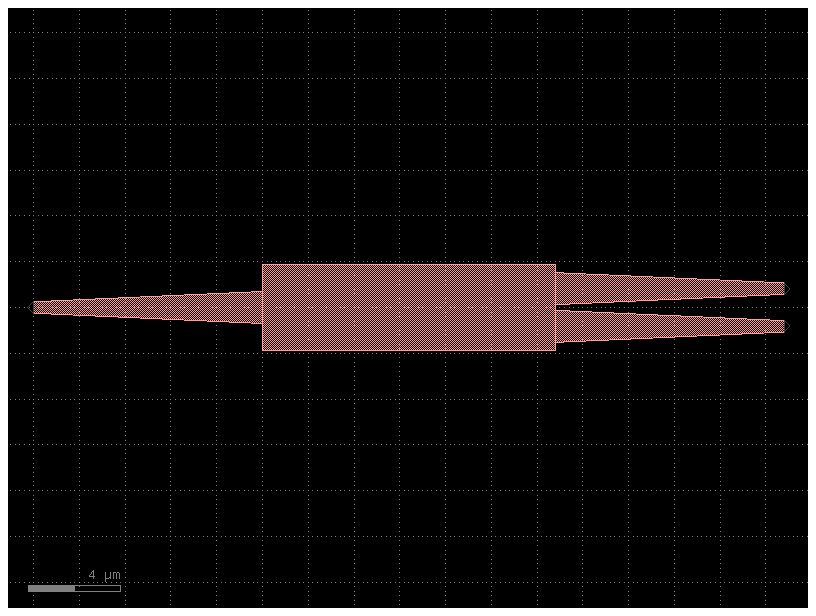

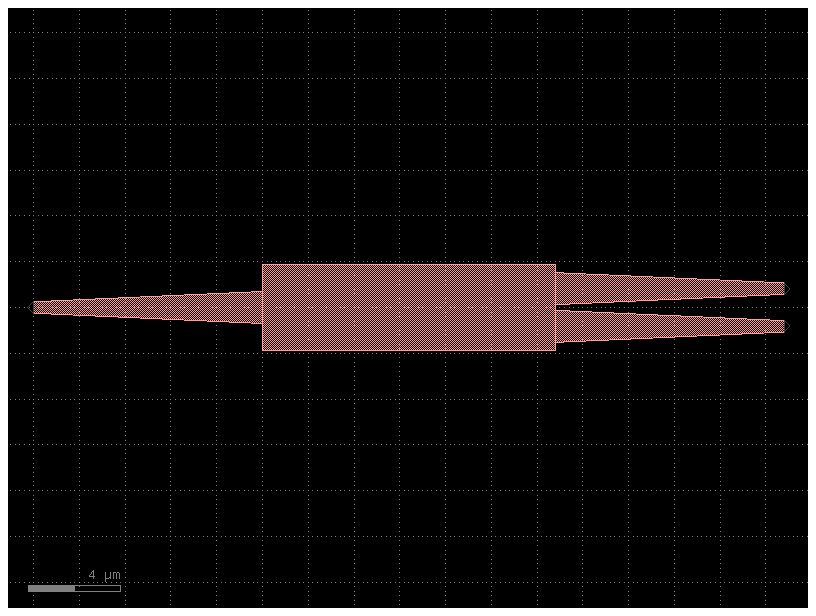

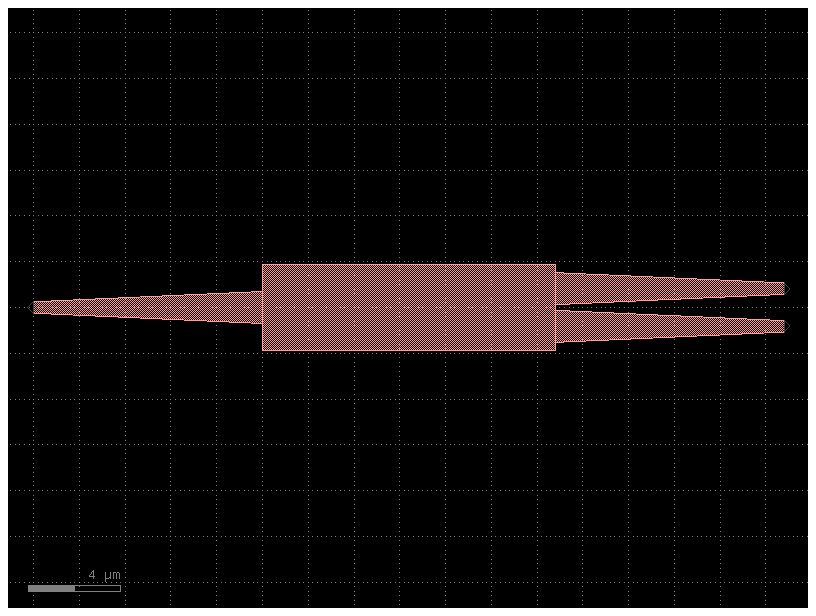

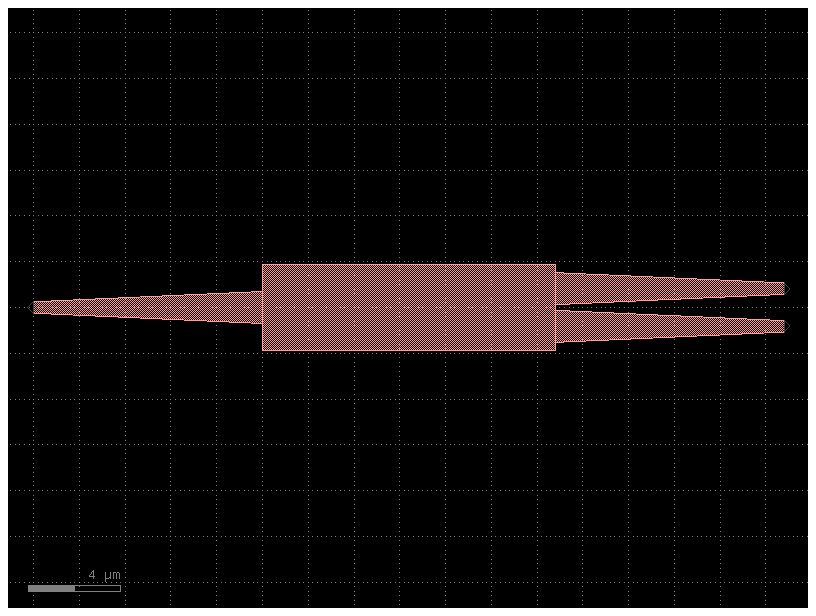

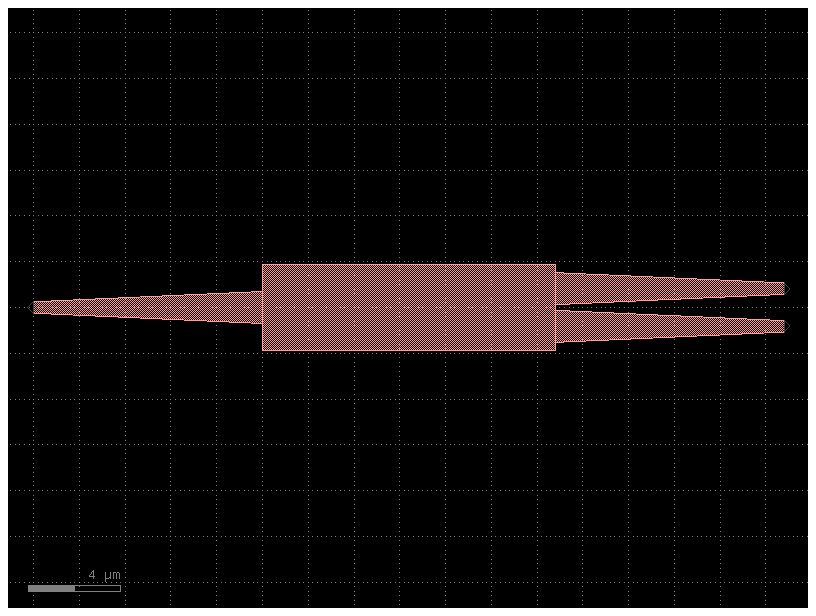

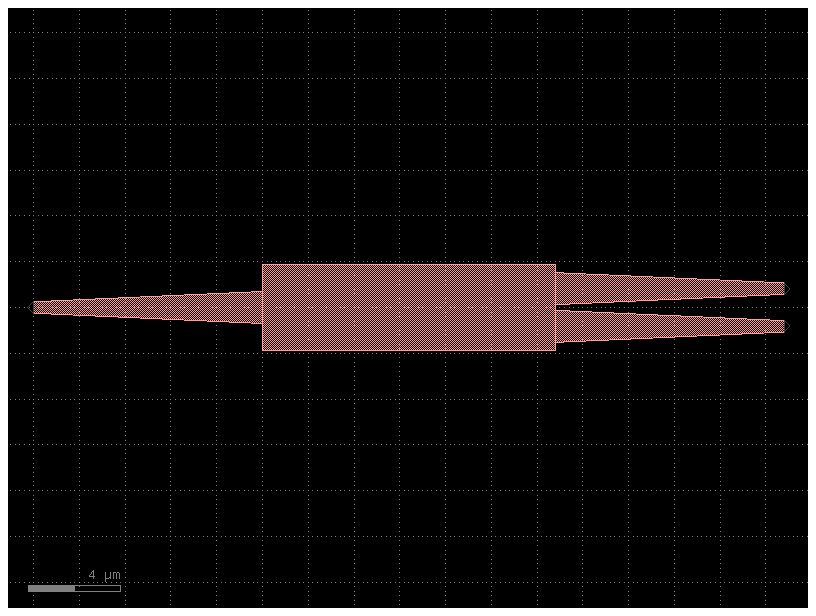

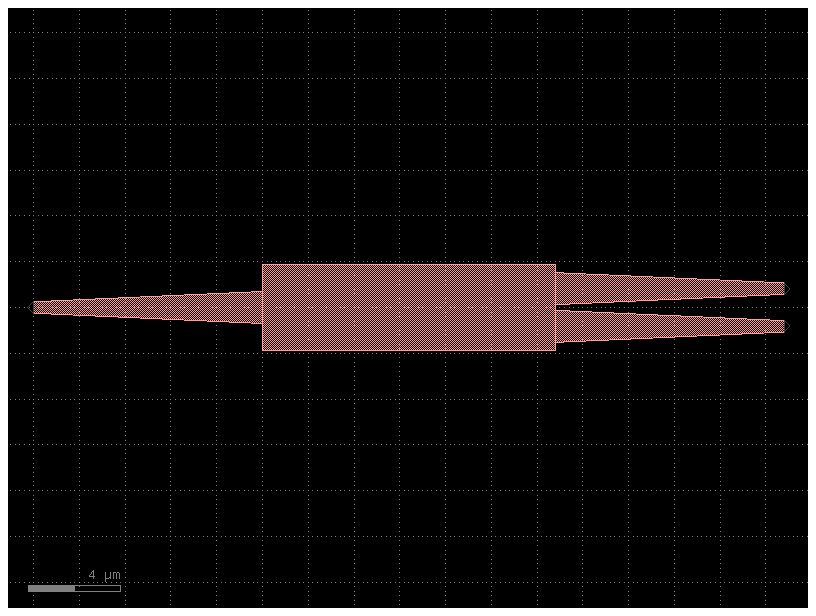

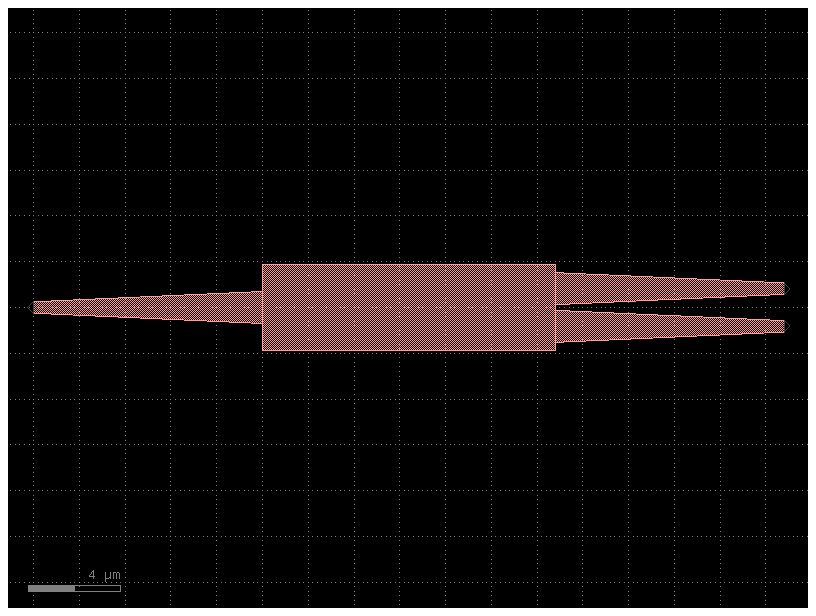

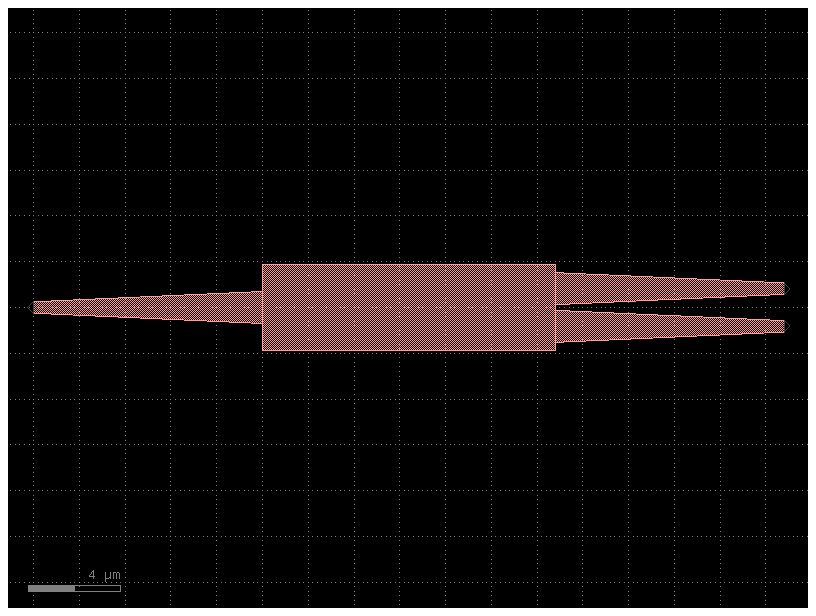

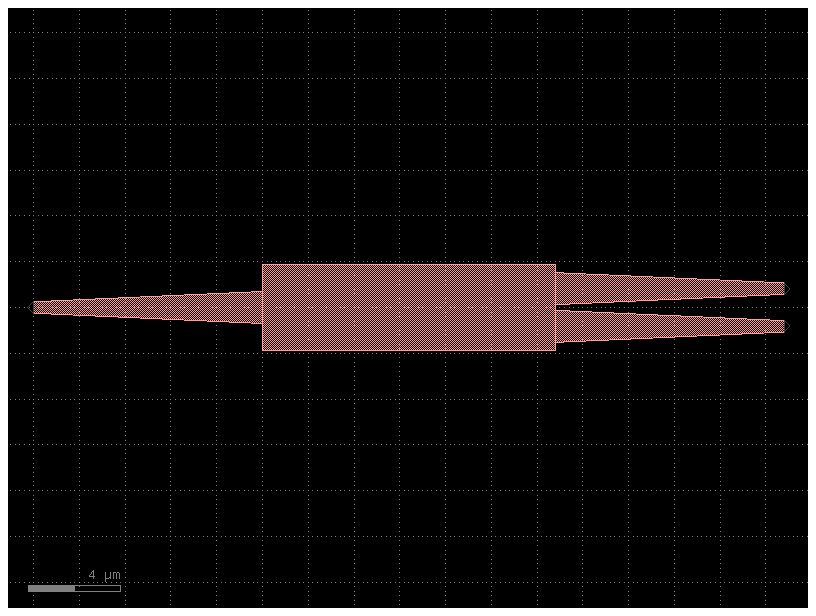

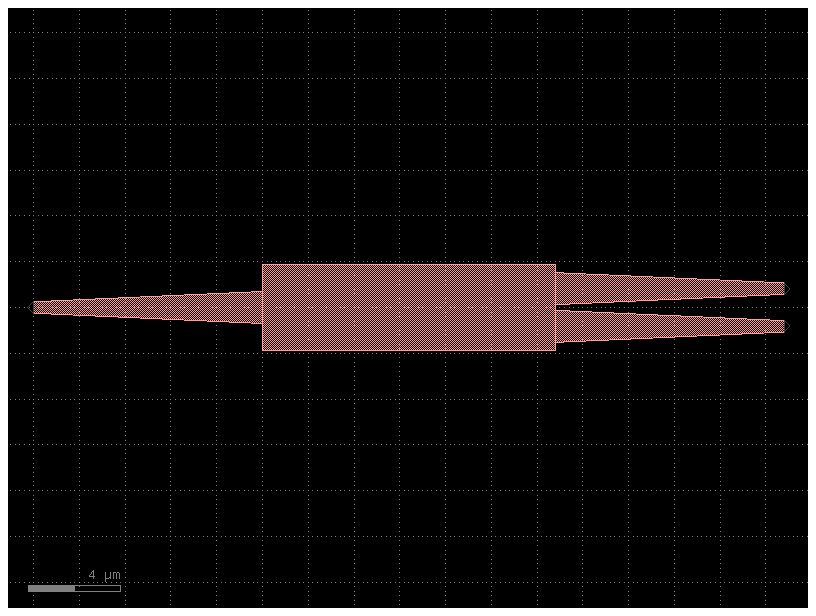

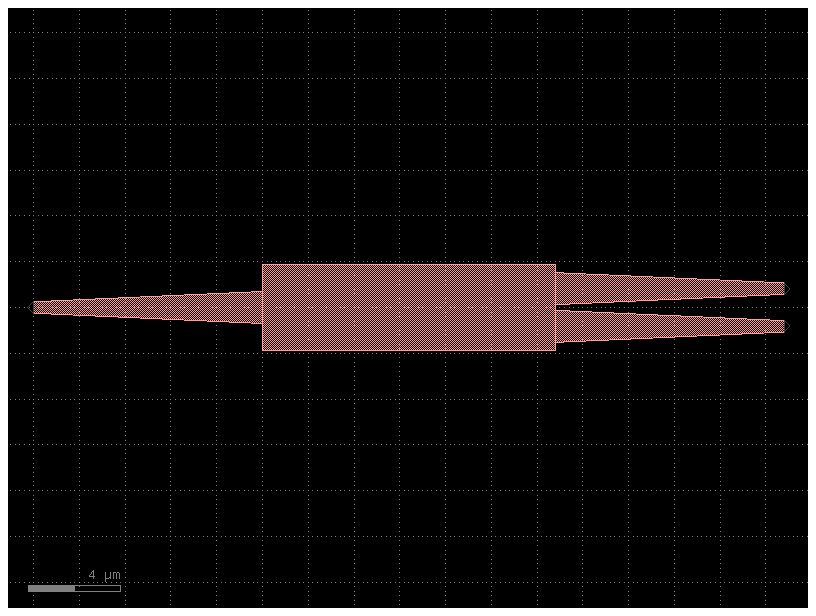

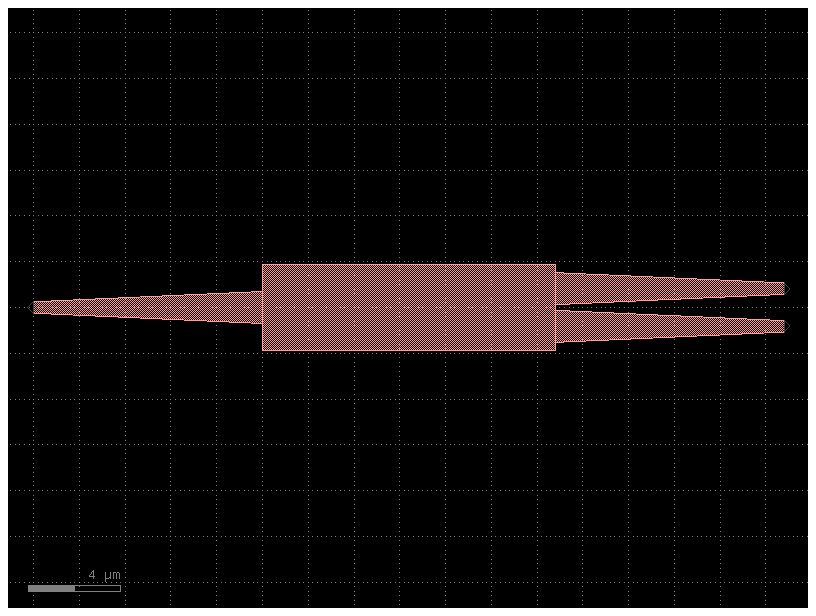

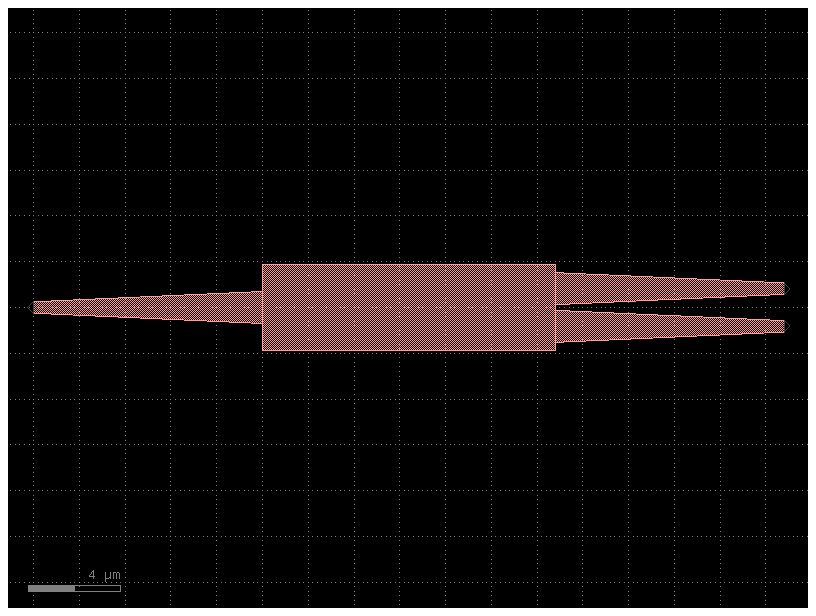

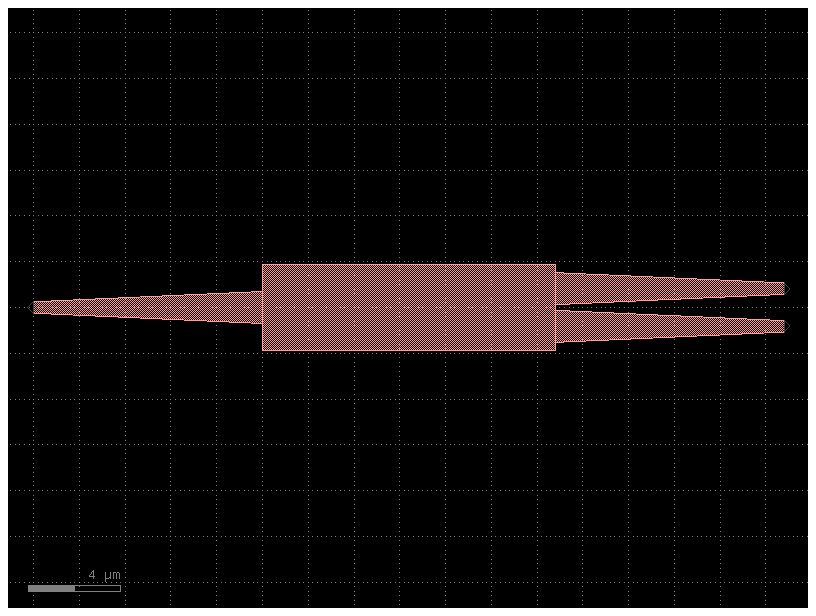

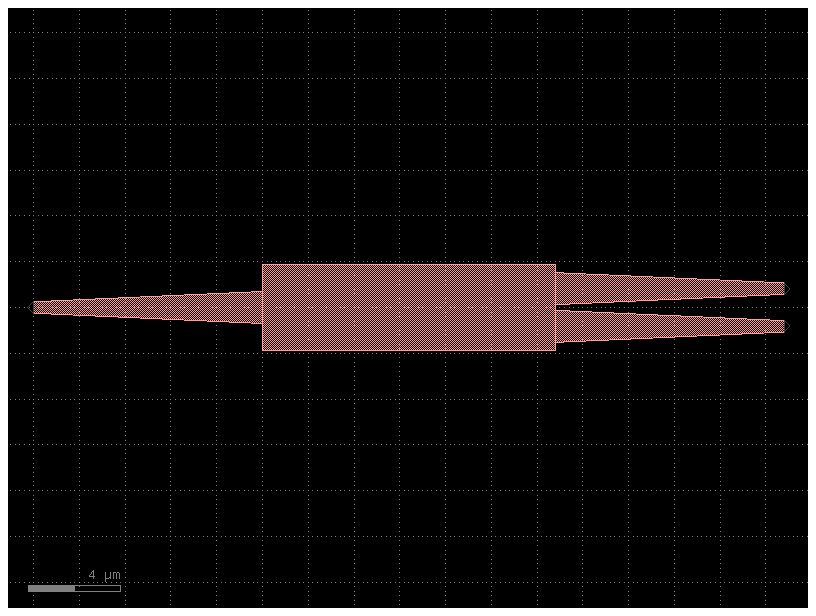

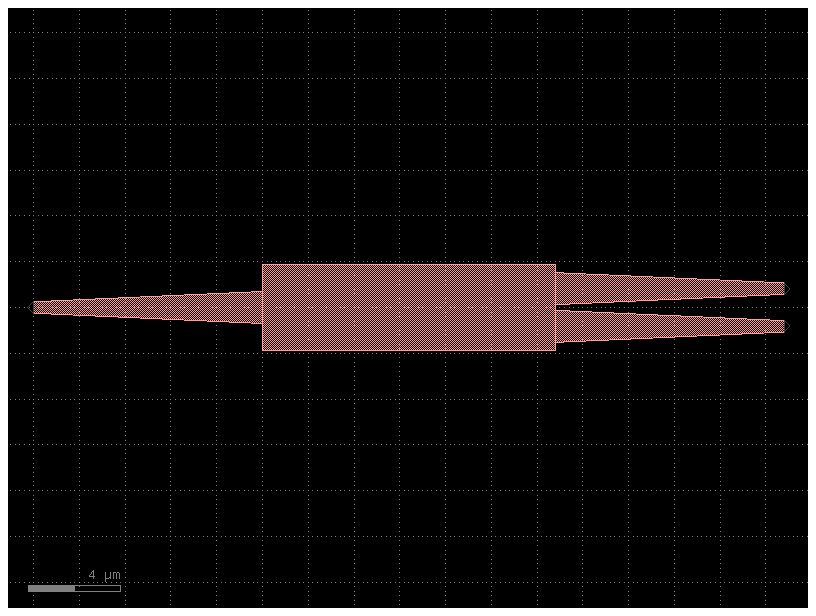

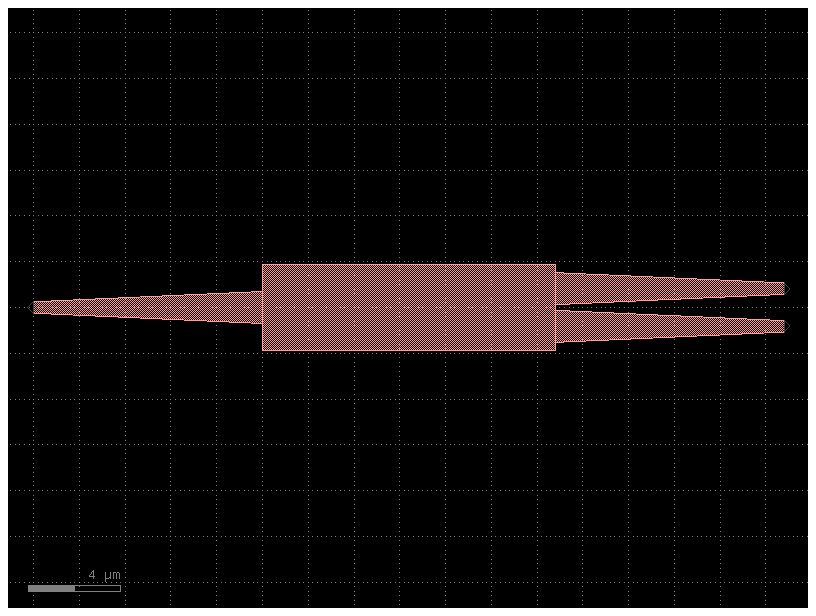

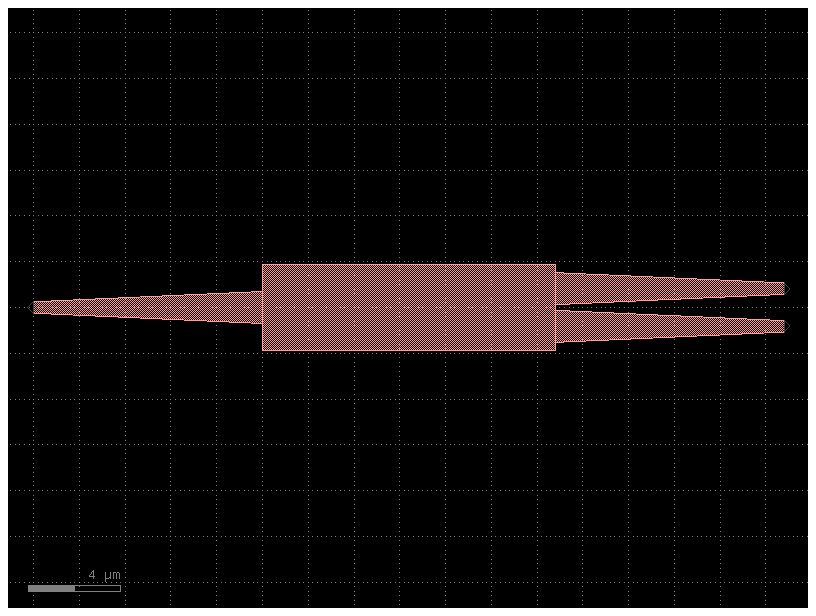

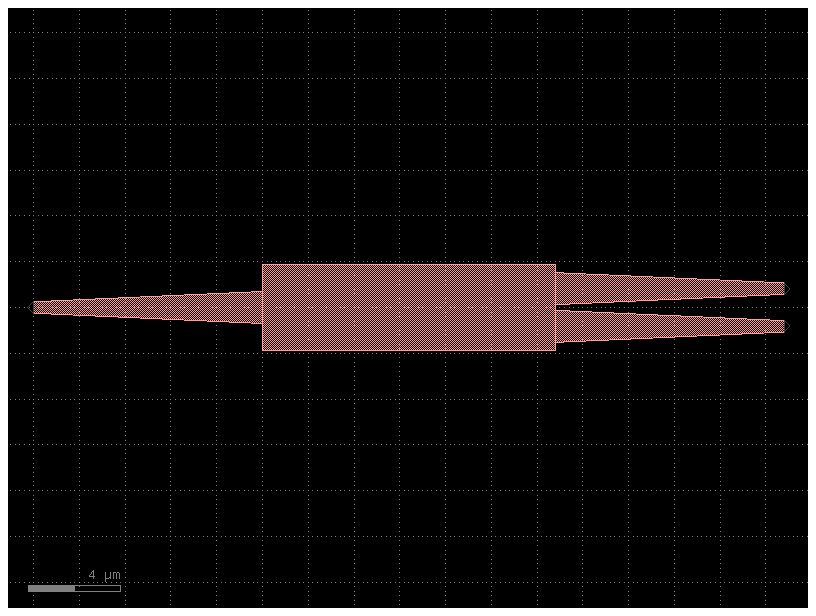

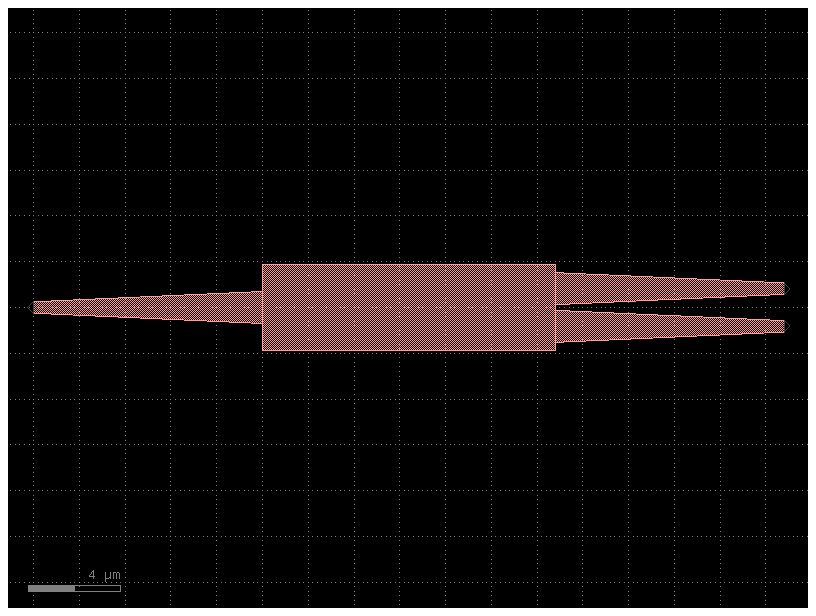

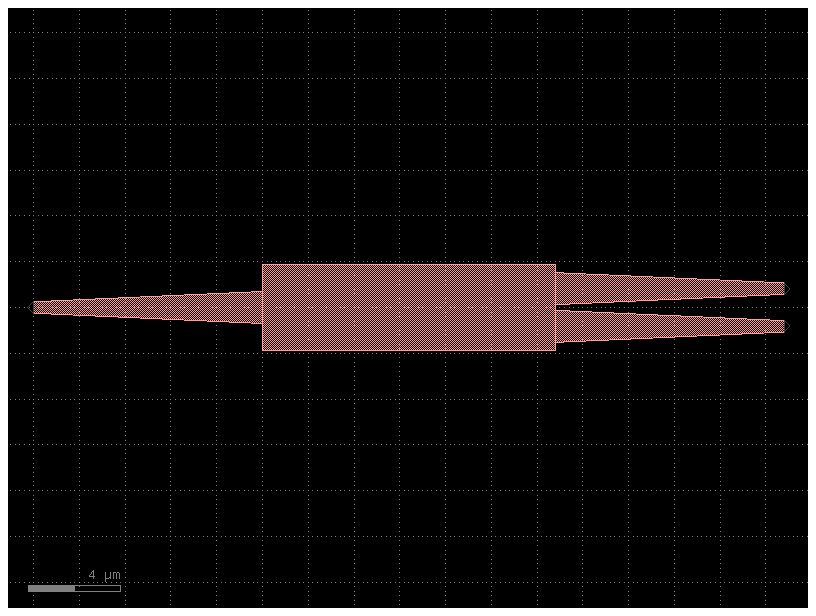

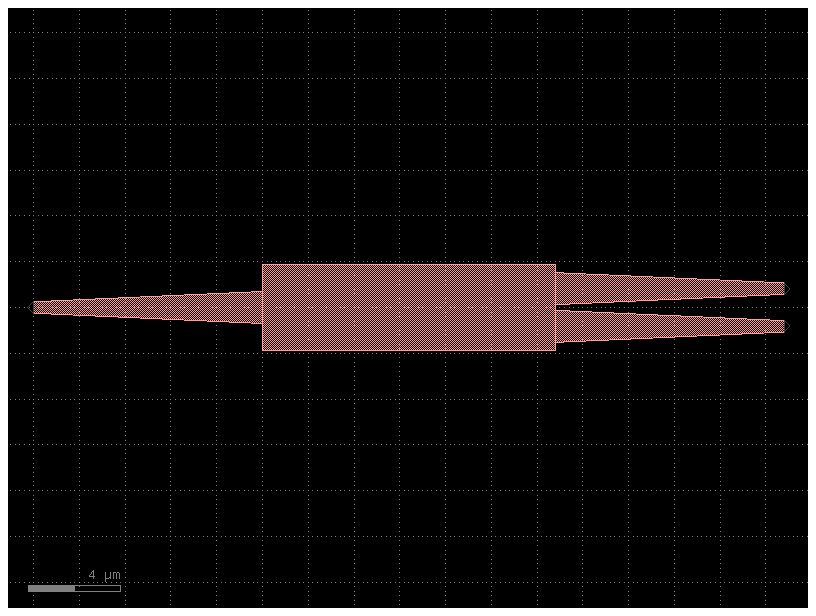

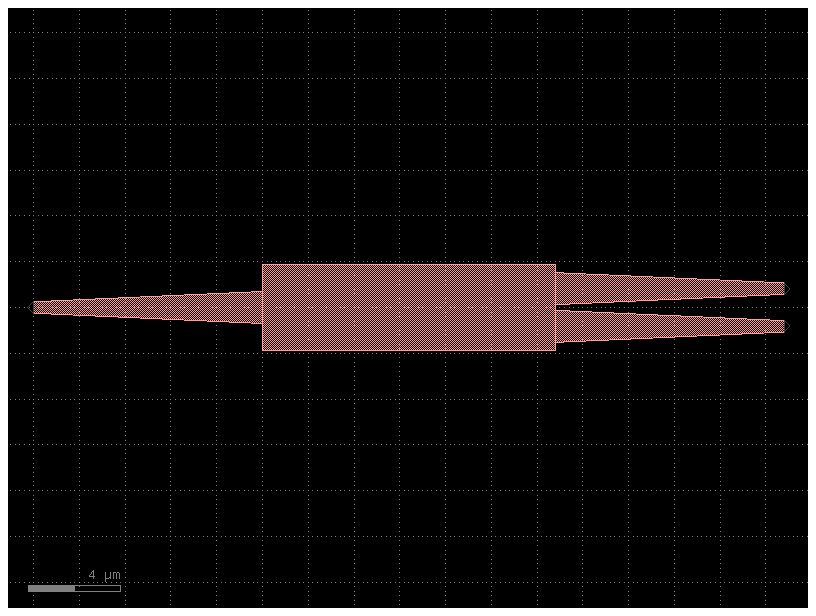

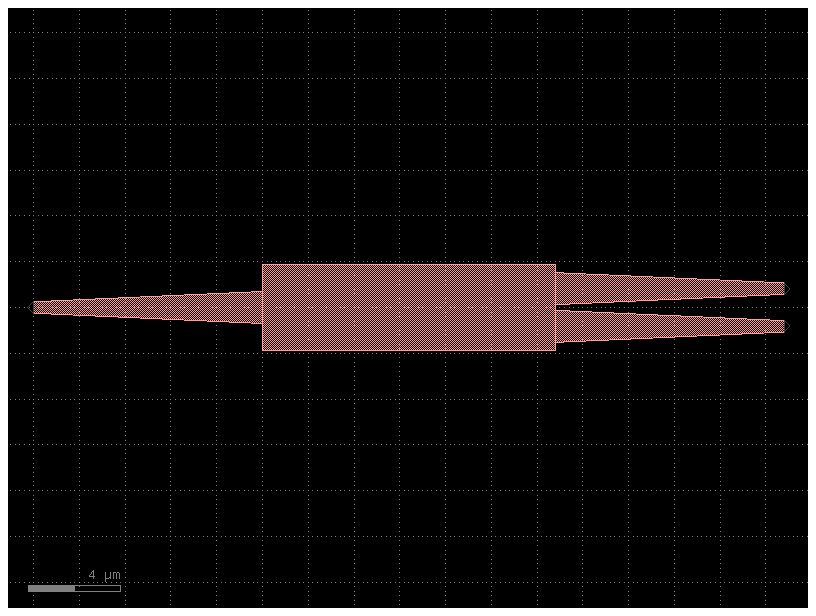

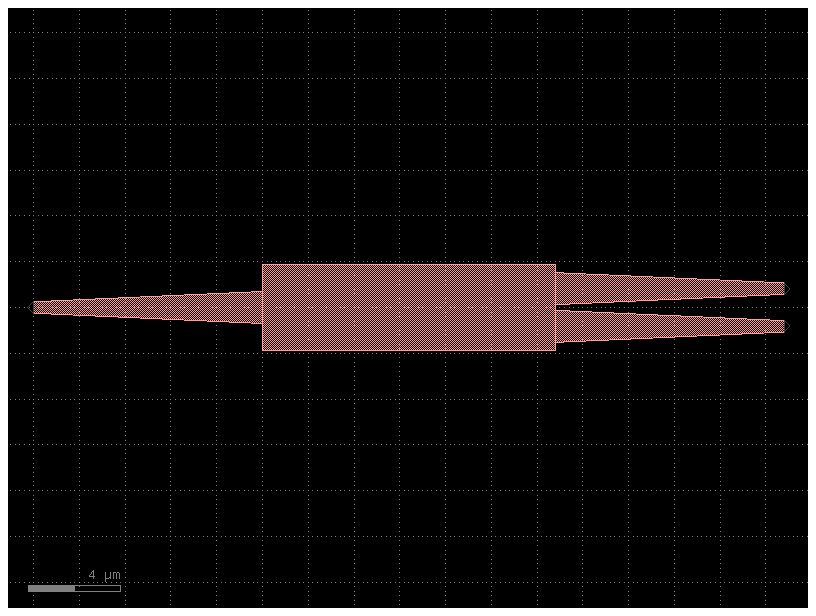

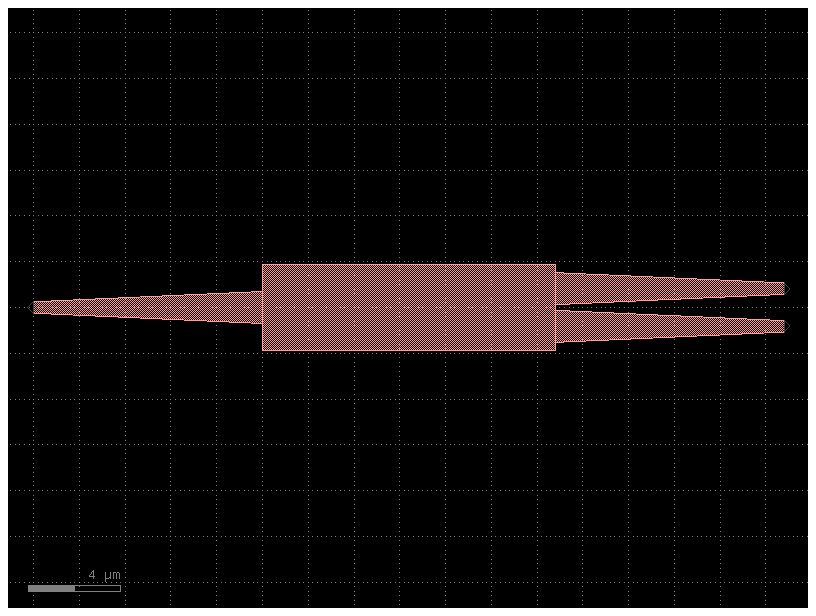

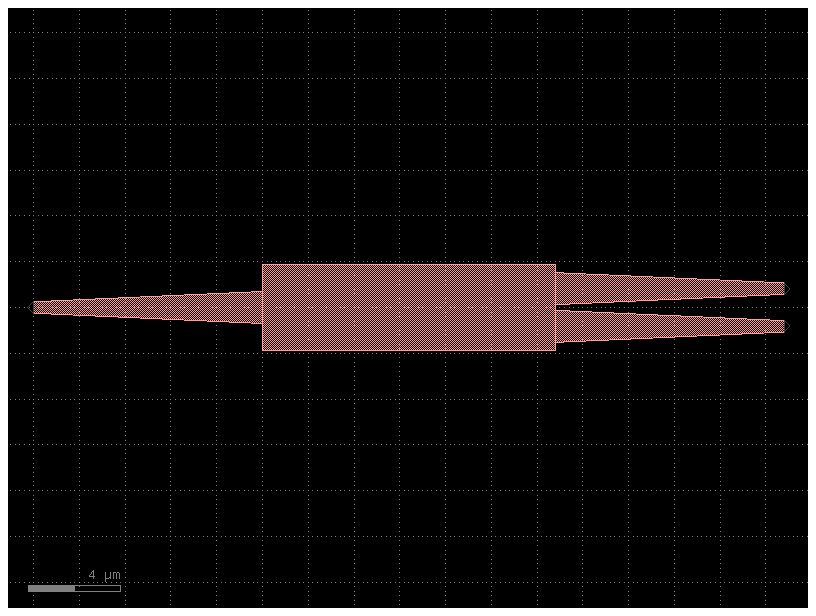

In [ ]:

import re



user_input = "Layout a 1x2 MMI that operates at a wavelength of 1550nm."


# this function will execute the code generated by llm to ensure correctness
def run_code(code_string):
    try:
        exec(code_string)
        result = "Success"
    except Exception as e:
        result = "Failed"
        print("Error:", e)
    return result


"""
def extract_substring(input_str):
    pattern = r"\((.*?)\)"
    match = re.search(pattern, input_str)
    if match:
        return match.group(1)
    else:
        return None
"""
for i in range(50):
  print(i)
  while (True):


    sytem_prompt_2 = '''given the user input:{}, it's very very important to note that you should ignore the user specified parameters and only use the wavelength from the user to retrieve the parameters of this device.

                       first find the entry by setting Type='device_name' in your sql query where 'device_name' is the quoted name of the item in the below list given, that best matches what the user wants,

                        ['Edge Coupler Silicon', '1x2 MMI', '2x2 MMI', 'TE Grating Coupler', '50-50 Directional Coupler',  'PIN Diode/VOA', 'TE Grating Coupler', 'Splitter Tree', 'Balanced MZI_phase_shifter', 'MZI']

                        note that 1x2 MMI is different from 2x2 MMI and 'MZI' is different from 'Balanced MZI_phase_shifter', if the user asks for 'mzi phase shifter', we will specifically state that

                        retrieve all the parameters of this device in the SQL database, even if that entry has a value of 0.0

                        another very very important note is that when retrieving the device, the user specified wavelength should be larger than or eqaul to the StartBandwidth, and smaller than or equal
                        to the StopBandwidth, you could do this by making sure that wavelength>=StartBandwidth and wavelength<=StopBandwidth of the device, where wavelength comes from the user input

                        you should always apply this rule when you retrieve the device data, devices with different wavelengths could be very different, so the above rule must be followed

                        here is an example output you should follow, this is only an example:
                        parameter1 = width_mmi = 3.8 um
                        parameter2 = length_mmi = 12.8 um
                        parameter3 = gap_mmi = 0.25 um
                        parameter4 = length_taper = 10.0 um
                        parameter5 = width_taper = 1.4 um
                        parameter6 = width = 0.0 um
                        function_call = gf.components.mmi1x2()

                        you should always follow the format of this example in your output
                        '''.format(user_input)

    # first the llm will output the paramters of the device from the sqlite database
    # the output consists of 2 parts, one is the physical paramters of the device, the other part is a default gdsfactory function call for that device,
    # the function call will contain default parameters of that device, and later we will compare the numbers of both parts to make sure they're not the same
    # this is an example of what the llm will output:
    # parameter1 = width_mmi = 3.8 um
    # parameter2 = length_mmi = 12.8 um
    # parameter3 = gap_mmi = 0.25 um
    # parameter4 = length_taper = 10.0 um
    # parameter5 = width_taper = 1.4 um
    # parameter6 = width = 0.0 um
    # function_call = gf.components.mmi1x2()

    response_2 = sql_query_engine.query(sytem_prompt_2)
    print(response_2)
    input_string = str(response_2)
    parameters_dict = {}
    parameters_dict_2 = {}
    function_call = ""
    # Iterate through each line of the string to extract the parameter numbers and default function call
    for line in input_string.split('\n'):
        # this if statement deals with physical paramters part of the output, sometimes the parameter could be a function, we need to extract the numbers
        # from that function as well, such as: "splitter = mmi1x2(width_mmi = 3.8 um, length_mmi = 12.8 um, gap_mmi = 0.25 um)""
        if line.count('=') > 3 and not line.strip().startswith('function_call'):
            parsed_list = re.split(r'[=(),]', line)

            # Remove empty strings from the list
            parsed_list = [item.strip() for item in parsed_list if item.strip()]


            # Iterate through the parsed_list
            for i in range(len(parsed_list)):
                # If the current item is a float number, store it as value, this will be the parameters of the device
                # note that only float numbers will be parsed
                try:
                    value = float(parsed_list[i])
                    key = parsed_list[i-1].strip()
                    # Store the key-value pair in the dictionary
                    parameters_dict[key] = value
                except ValueError:
                    continue
        # this if statement deals with function_call part of the output
        elif line.strip().startswith('function_call'):
          function_call = line
          parsed_list = re.split(r'[=(),]', line)


          parsed_list = [item.strip() for item in parsed_list if item.strip()]
          for i in range(len(parsed_list)):
              try:
                  value = float(parsed_list[i])
                  key = parsed_list[i-1].strip()
                  parameters_dict_2[key] = value
              except ValueError:
                  continue
        # this else case is also for physical parameters, it will deal with output like this: "parameter1 = width_mmi = 3.8 um"
        else:

          # Split each line by the equal sign
          parts = line.split('=')

          # Check if there are two parts and if the right side is a float number
          if len(parts) == 3:
              key = parts[1].strip()
              value = parts[2].strip().strip("um")
              # Check if the value is a float
              try:
                  float_value = float(value)
                  parameters_dict[key] = float_value
              except ValueError:
                  continue
    print("sql parameters:")
    print(parameters_dict)
    print("default parameters:")
    print(parameters_dict_2)

    # compare the numbers of default parameters and the extracted numbers

    if(parameters_dict==parameters_dict_2 or not parameters_dict or not parameters_dict_2):
       print("default parameters are extracted or none is returned")
       continue
    elif (set(parameters_dict.keys()) != set(parameters_dict_2.keys())):
       print("wrong parameters")
       continue


    sytem_prompt_3 = ''' write the script that draws a device in gdsfactory using the function template provided: {}, and parameters for the function: {}, refer to the 'function_call' in the sql response as a template when generating the code and nothing else.
                      for example, the 'function_call' will be a line of code that looks something like this: c = gf.components.mzi(delta_length=10.0, length_y=2.0, length_x=0.1),
                      you should replace the numbers for all these parameters (delta_length, length_y, length_x) with the numbers in the sql response,

                      it's very important to make sure that you included 'all' the parameters from the sql response when writing your code, even though some parameters have similar names, they still have different meanings,
                      so just include all of them

                      here is an example script, the example is just to show you the format of your output, the second line of the example should be replaced by your output:

                      import gdsfactory as gf
                      c = gf.components.wire_straight()
                      c.plot()

                      remember to include 'c.plot()' and 'import gdsfactory as gf' in your code, note that some parameters such as periods should use integer values instead of float numbers
                      '''.format(function_call, parameters_dict)
    # the llm will generate the code using function_call as a reference, it essentially will replace the parameters in the default function_call
    # with the extracted numbers
    response_3 = query_engine_vector_inst.query(sytem_prompt_3)
    print(response_3)
    response_3 = str(response_3)
    parameters_dict_3 = {}

    # parse the parameters in the generated code
    parsed_list = re.split(r'[=(),]', response_3)
    parsed_list = [item.strip() for item in parsed_list if item.strip()]
    for i in range(len(parsed_list)):
        try:
            value = float(parsed_list[i])
            key = parsed_list[i-1].strip()
            parameters_dict_3[key] = value
        except ValueError:
            continue

    print(parameters_dict_3)

    # checks whether the numbers in the code are the same as the numbers from the sqlite database
    if (parameters_dict_3 == parameters_dict_2):
      print("default parameters are used")
      continue
    elif (parameters_dict_3 != parameters_dict):
       print("wrong parameters")
       continue

    system_prompt_4 = '''given the user query:{}, ignore the wavelength the user talked about,
                          given the current version of code here: {}, I want you to update the parameter numbers in the code as the user asked, if the user specifies a parameter to be
                          a different number than the current number in the code, then change it to the user specified number.

                          It's very very important to note that if the user doesn't specify any parameters, then do nothing and only output the current version of code I provided and stop generating code


                        here is an example script, the example is just to show you the format of your output, the second line of the example should be replaced by your output:

                        import gdsfactory as gf
                        c = gf.components.wire_straight()
                        c.plot()   '''.format(user_input,response_3 )

    # we will modify the code is the user wants to specify a certain parameter for the device
    response_4 = query_engine_vector_inst.query(system_prompt_4)
    response_4 = str(response_4)

    # parse the parameters of the final version of code
    parameters_dict_5 = {}

    parsed_list = re.split(r'[=(),]', response_4)
    parsed_list = [item.strip() for item in parsed_list if item.strip()]
    # Iterate through the list of parameters
    for i in range(len(parsed_list)):
        try:
            value = float(parsed_list[i])
            key = parsed_list[i-1].strip()
            parameters_dict_5[key] = value
        except ValueError:
            continue
    print("final version")
    print(parameters_dict_5)
    float_pattern = r'\b\d+\.\d+\b'

    # Find all matches of float numbers in the user input, and later we will check whether the parameter has been modified successfully
    # one limitation to this checker is that the user has to know the exact name for the parameter in gdsfactory, for example, if users want to
    # change the gap of a mmi 1x2, they would have to specify "gap_mmi=..." in the user input, because gap_mmi is the correct parameter name
    # in gdsfactory, any other case would fail

    # If we remove this checker, then the user doesn't need to know the exact name of the parameter, but the success rate will decrease
    float_numbers = re.findall(float_pattern, user_input)

    parameters_dict_4 = {}

    # Iterate through each float number found
    for float_number in float_numbers:
        index = user_input.find(float_number)
        # Get the word preceding the float number
        word_before_float = user_input[:index].split()[-1]
        # Store the word and the float number in the dictionary
        word_before_float = word_before_float.rstrip('=')
        parameters_dict_4[word_before_float] = float(float_number)


    print("user specified parameters")
    print(parameters_dict_4)
    parameter_update = True
    if (parameters_dict_4):
        for key in parameters_dict_4:
            if key in parameters_dict_5:
                if parameters_dict_4[key] != parameters_dict_5[key]:
                    print(f"parameter for key '{key}' not updated")
                    parameter_update = False
                    break
    if (parameter_update == False):
        continue

    start_index = response_4.find("import gdsfactory as gf")

    output_substring = response_4[start_index:]
    print("final code: " + output_substring)
    result = run_code(output_substring)
    if (result == "Success"):
      print(result)
      break
    else:
      print("failed")
      continue
